In [119]:
#Start by importing necessary packages, for now: Pandas and NumPy.
#Import all the files, we will be using IMDB and Box Office Mojo statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [4]:
#Preview each of the files to understand the data and pose questions.
a = df1.head()
b = df2.head()
c = df3.head()
d = df4.head()
e = df5.head()
f = df6.head()
g = df7.head()
display(a)
display(b)
display(c)
display(d)
display(e)
display(f)
display(g)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
df7.sort_values(by=['averagerating'], ascending=False).loc[df7['numvotes'] > 1000]
#sorting the movies by their average rating for ratings that received more than 1000 votes.
#potential question: Is there a positive correlation between the number of votes a movie receives and its average rating?
#expanding: Would people be more likely to rate a good movie? Or not necessarily and rate bad movies as well.

,tconst,averagerating,numvotes
63149,tt7131622,9.7,5600
54115,tt4131686,9.6,1339
27195,tt6058226,9.6,2604
12174,tt5963218,9.5,6509
4461,tt7738784,9.4,9629
...,...,...,...
3887,tt9364684,1.4,3511
9965,tt4404474,1.3,6249
5794,tt8081062,1.3,3244
39053,tt7221896,1.3,36986


In [5]:
df7[df7.duplicated(keep=False)].sort_values(by=['averagerating'])
#check for duplicates

,tconst,averagerating,numvotes


In [10]:
#potential question 2: Are some genres more popular in foreign countries and thus more successful, as opposed to domestic?/ Which genres are most popular in top 10 countries?
#A good place to start is by checking foreign vs domestic gross and number of ratings/votes.
#Use df1, df4 and df7

In [92]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [96]:
#Cleaning up df4 by dropping all rows with missing values, (large data set, dropping is fine)
#Now create a list with all the genres
ndf4 = df4.dropna()
genres = []
for x in ndf4['genres']:
    for g in x.strip('[]').split(','):
        if not g in genres:
            genres.append(g)
genres.sort()
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [100]:
#Checks for duplicates by creating a set and removing white spaces.
genres = set(list(map(lambda x: x.strip(' '), genres)))

In [101]:
#Creating a column for each unique genre in the ndf4, with boolean values
for genre in genres:
    ndf4[genre] = ndf4['genres'].apply(lambda x: genre in x)

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
pd.set_option('max_columns', None)
ndf4.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Reality-TV,Musical,Documentary,Western,News,Sport,History,Short,Talk-Show,Biography,War,Thriller,Drama,Comedy,Adventure,Family,Mystery,Music,Animation,Game-Show,Crime,Sci-Fi,Action,Adult,Fantasy,Horror,Romance
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


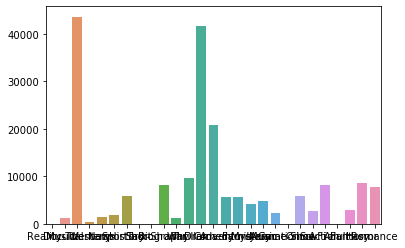

In [133]:
dct = {}
for genre in genres:
    dct[genre] = ndf4[genre].sum()
dct
genres = list(dct.keys())
num_genres = list(dct.values())
sns.barplot(genres,num_genres)

In [106]:
DF1 = pd.merge(df7,ndf4[['tconst','Reality-TV','Musical','Documentary','Western','News',
                        'Sport', 'History', 'Short', 'Talk-Show', 'Biography',
                        'War', 'Thriller', 'Drama', 'Comedy', 'Adventure', 'Family',
                        'Mystery', 'Music', 'Animation', 'Sci-Fi', 'Crime',
                        'Game-Show', 'Action', 'Adult', 'Fantasy', 'Horror', 'Romance']], how='outer')
DF1.dropna().head()

,tconst,averagerating,numvotes,Reality-TV,Musical,Documentary,Western,News,Sport,History,Short,Talk-Show,Biography,War,Thriller,Drama,Comedy,Adventure,Family,Mystery,Music,Animation,Sci-Fi,Crime,Game-Show,Action,Adult,Fantasy,Horror,Romance
0,tt10356526,8.3,31.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,tt10384606,8.9,559.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt1042974,6.4,20.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt1043726,4.2,50352.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
4,tt1060240,6.5,21.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [91]:
pd.merge(DF1,ndf4, how='outer').dropna().sort_values(by=['runtime_minutes'], ascending=False).loc(ndf4['runtime_minutes'] > 120)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [30]:
DF1['Musical'].sum()

638

In [49]:
ndf4.sort_values(by=['start_year'], ascending=False).loc[ndf4['runtime_minutes'] > 120].drop(['original_title'], axis=1)
#which genres tend to have higher average runtimes? and do they necessarily lead to more revenue?

,tconst,primary_title,start_year,runtime_minutes,genres,Reality-TV,Musical,Documentary,Western,News,Sport,History,Short,Talk-Show,Biography,War,Thriller,Drama,Comedy,Adventure,Family,Mystery,Music,Animation,Sci-Fi,Crime,Game-Show,Action,Adult,Fantasy,Horror,Romance
136826,tt8741304,Variance,2020,134.0,Drama,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127678,tt7830722,Rashna:The Ray of Light,2020,150.0,"Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3669,tt10356650,Dream: The Life of Two Tales,2020,128.0,"Action,Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
81669,tt4695264,Lawrence: After Arabia,2020,126.0,Drama,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
140276,tt9089992,Blackboard vs Whiteboard,2019,152.0,"Action,Family",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,tt1703851,Working Girl,2010,151.0,Drama,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13894,tt1700471,Love(less),2010,146.0,"Romance,Sci-Fi",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
28478,tt2102353,Kohi Mero,2010,126.0,Romance,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
13909,tt1700779,Deal or Not Deal,2010,130.0,"Adventure,Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
Q1 = ndf4.sort_values(by=['start_year'], ascending=False).loc[ndf4['runtime_minutes'] > 120].drop(['original_title'], axis=1).iloc[:,6:]
Q1

,Musical,Documentary,Western,News,Sport,History,Short,Talk-Show,Biography,War,Thriller,Drama,Comedy,Adventure,Family,Mystery,Music,Animation,Sci-Fi,Crime,Game-Show,Action,Adult,Fantasy,Horror,Romance
136826,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127678,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3669,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
81669,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
140276,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
28478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
13909,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
DF2 = df1.join(df7, how='outer')
DF2

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt10356526,8.3,31
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,tt10384606,8.9,559
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,tt1042974,6.4,20
3,Inception,WB,292600000.0,535700000,2010.0,tt1043726,4.2,50352
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,tt1060240,6.5,21
...,...,...,...,...,...,...,...,...
73851,NaN,NaN,NaN,NaN,NaN,tt9805820,8.1,25
73852,NaN,NaN,NaN,NaN,NaN,tt9844256,7.5,24
73853,NaN,NaN,NaN,NaN,NaN,tt9851050,4.7,14
73854,NaN,NaN,NaN,NaN,NaN,tt9886934,7.0,5


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [79]:
#which directors typically have a high ROI?
df2 = df2.drop(['birth_year', 'death_year'], axis=1).head(5)

KeyError: "['birth_year' 'death_year'] not found in axis"

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
